In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [5]:
def visualize(directory):
    try:
        data_dir = os.path.join(directory, "KS_DOS_total.dat")
        control_dir = os.path.join(directory, "control.in")
    except BaseException:
        print("File not found.")
    
    with open(control_dir, "r") as f:
        texts = f.readlines()
        text = list(filter(lambda x: "dos_kgrid_factors" in x, texts))[0].strip()
        value = text.split("rs")[-1]
        # print(value)

    data = np.loadtxt(data_dir)
    df = pd.DataFrame(data[:, :2], columns=["Energy", "DOS"])

    plt.figure(figsize=(10,6))
    sns.lineplot(data = df, x="Energy", y="DOS")
    plt.title(f"DOS = {value}: {directory}")
    plt.ylim(0, 0.7);

run1
run10
run2
run3
run4
run5
run6
run7
run8
run9


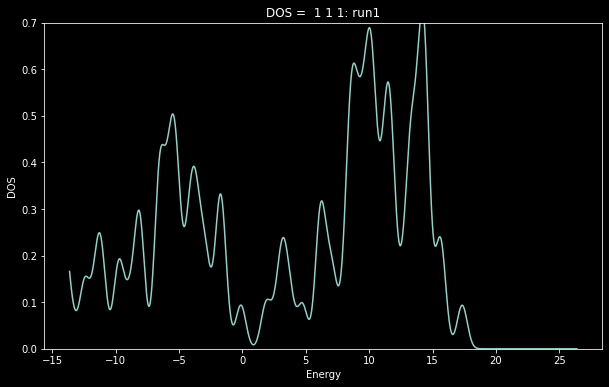

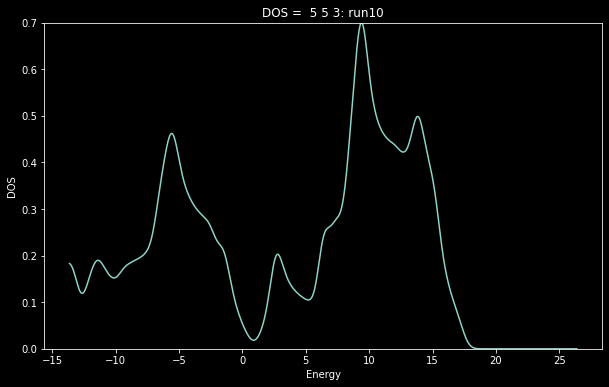

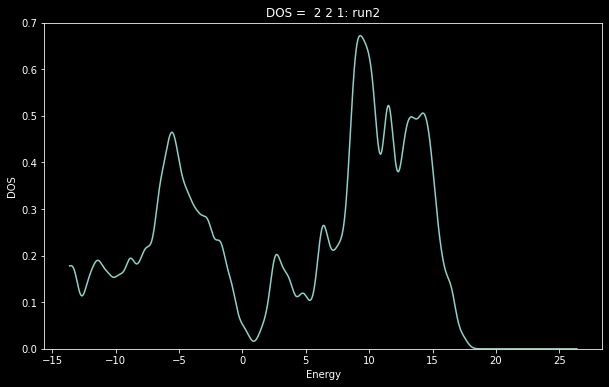

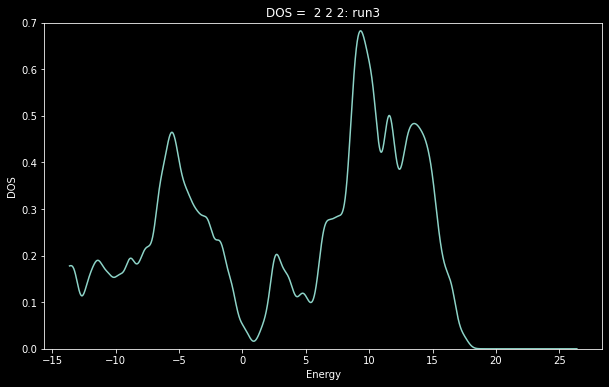

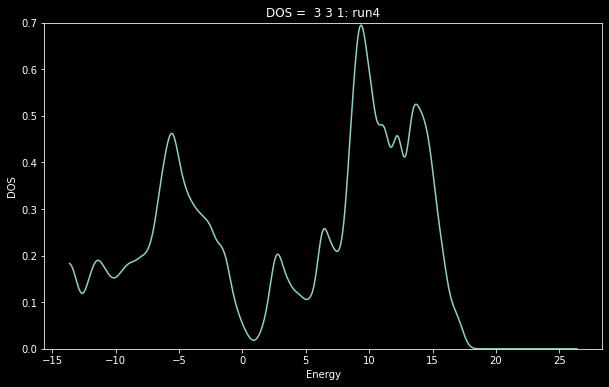

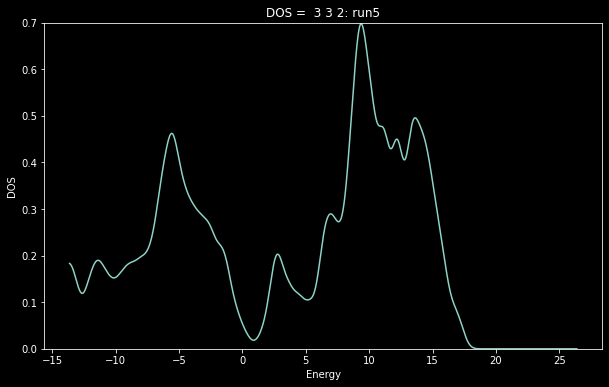

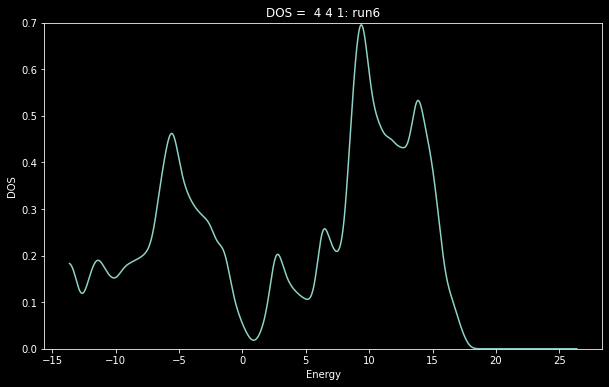

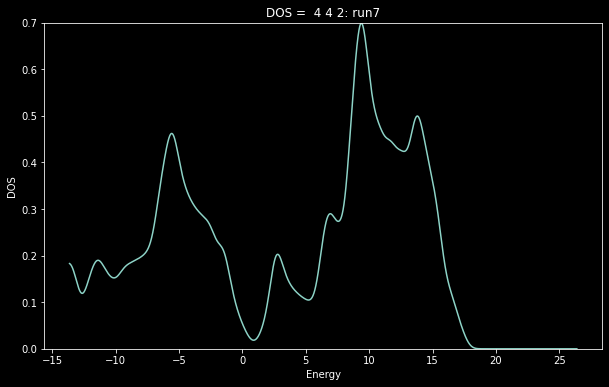

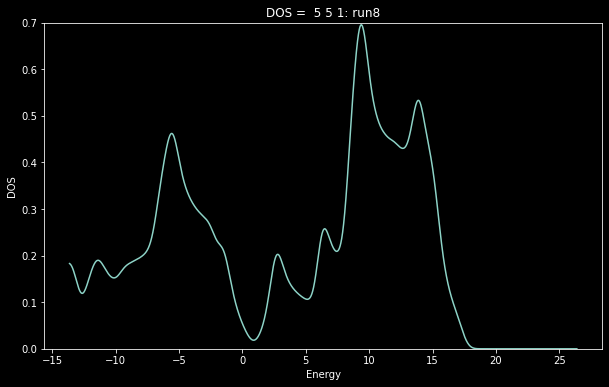

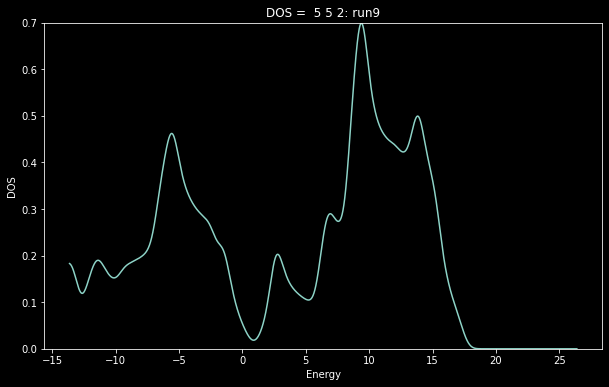

In [7]:
for dir in os.listdir("."):
    if os.path.isdir(dir):
        print(dir)
        try:
            visualize(dir)
            plt.savefig(os.path.join(dir, "DOS.png"))
        except BaseException:
            print("No file found.")